In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Imputer

In [2]:
# read in the new cleaned datasheet
df = pd.read_excel('..\Data Cleanup\cleaned_data.xlsx', sheet_name = 'master')

In [3]:
data = df[(df['LoadingUn'] == 'CFU/cm^2') & (df['EffMeas'] == 'LR') & (df['AreaUn'] == 'cm^2') & (df['ConcDoseUn'] == "g/mL")]

In [4]:
cd = pd.DataFrame()

# cd['AppMethod'] = data.AppMethod
cd['Loading'] = data.Loading
cd['ConcDose'] = data.ConcDose
cd['ClO2'] = data.ClO2
cd['MB'] = data.MB
cd['H2O2'] = data.H2O2
cd['VolApp'] = data.VolApp
cd['Temp'] = data.Temp
cd['RH'] = data.RH
cd['ContTime'] = data.ContTime
cd['Eff'] = data.Eff
cd['N'] = data.N
cd['Rinsate'] = data.Rinsate
cd['TotalApp'] = data.TotalApp
cd['IndoorInterior'] = data.IndoorInterior
cd['IndoorExterior'] = data.IndoorExterior
cd['IndoorCarpet'] = data.IndoorCarpet
cd['IndoorNonCarpet'] = data.IndoorNonCarpet
cd['IndoorCeilings'] = data.IndoorCeilings
cd['HVAC'] = data.HVAC
cd['IndoorMisc'] = data.IndoorMisc
cd['OutdoorExterior'] = data.OutdoorExterior
cd['Roofing'] = data.Roofing
cd['Pavement'] = data.Pavement
cd['Water'] = data.Water
cd['Soil'] = data.Soil
cd['OutdoorMisc'] = data.OutdoorMisc
cd['UndergroundInterior'] = data.UndergroundInterior
cd['UndergroundCarpet'] = data.UndergroundCarpet
cd['UndergroundNonCarpet'] = data.UndergroundNonCarpet
cd['UndergroundCeilings'] = data.UndergroundCeilings
cd['UndergroundMisc'] = data.UndergroundMisc

In [6]:
surfaceCats = ['IndoorInterior', 'IndoorExterior', 'IndoorCarpet', 'IndoorNonCarpet', 'IndoorCeilings', 'HVAC','IndoorMisc', 
               'OutdoorExterior', 'Roofing', 'Pavement', 'Water', 'Soil', 'OutdoorMisc', 'UndergroundInterior', 
               'UndergroundCarpet', 'UndergroundNonCarpet', 'UndergroundCeilings', 'UndergroundMisc']

In [7]:
params = [
    #("Liquid Spray", 1),
    #("Foam Spray", 2),
    #("Liquid Immersion", 3),
    #("Gel", 4),
    #("Fumigation", 5),
    #("Aerosol", 6),
    #("Liquid Wipe", 7),
    ("IndoorInterior", 0),
    #("IndoorExterior", 0),
    #("IndoorCarpet", 0),
    #("IndoorNonCarpet", 0),
    #("IndoorCeilings", 0),
    #("HVAC", 0),
    #("IndoorMisc", 0),
    #("OutdoorExterior", 0),
    #("Roofing", 0),
    #("Pavement", 0),
    #("Soil", 0),
    #("Water", 0),
    #("OutdoorMisc", 0),
    #("UndergroundInterior", 0),
    #("UndergroundCarpet", 0),
    #("UndergroundNonCarpet", 0),
    #("UndergroundCeilings", 0),
    #("UndergroundMisc", 0)
]

1014


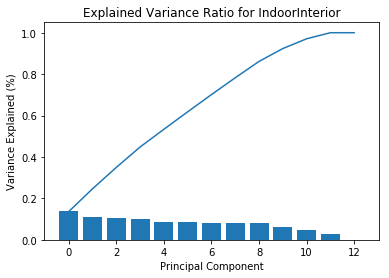

ContTime          0.694316
VolApp            0.684994
TotalApp          0.124722
N                 0.070692
MB                0.065894
H2O2              0.008214
IndoorInterior    0.000000
Temp             -0.004030
Rinsate          -0.023270
Loading          -0.027596
ClO2             -0.033996
RH               -0.058385
ConcDose         -0.133654
Name: 0, dtype: float64
0.6943155803148209
       Loading      ConcDose       ClO2         MB     H2O2    VolApp  Temp  \
357   0.265979  4.165000e-07  11.401937  13.019112  6.25974  0.035749   6.0   
364   0.265979  4.150000e-08  11.401937  13.019112  6.25974  0.035749   6.0   
371   0.265979  4.165000e-07  11.401937  13.019112  6.25974  0.035749   6.0   
1025  0.014716  8.333333e-10  11.401937  13.019112  6.25974  0.032875   6.0   
1026  0.014716  1.166667e-09  11.401937  13.019112  6.25974  0.032875   6.0   

            RH  ContTime         N   Rinsate  TotalApp       PC1  
357   0.019702  0.009921  0.869565  1.642236       0.0  0.543645

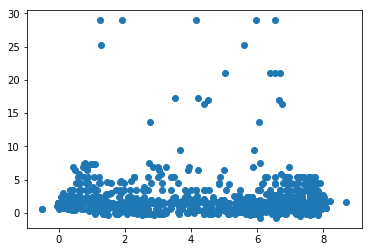

In [23]:
def pcaGenerator(category, counter):
    
    if counter == 0:
        data_filtered = cd[(cd[category] == 1)]
        
        for columnName in surfaceCats:
            if columnName != category:
                data_filtered = data_filtered.drop(columnName, axis=1)
    else:
        data_filtered = cd[(cd['AppMethod'] == counter)]
        
        for columnName in surfaceCats:
            data_filtered = data_filtered.drop(columnName, axis=1)

    data_for_imputing = data_filtered.dropna(how='all', axis='columns')
    
    if len(data_for_imputing) > 0:
        print(len(data_for_imputing))
        
        impute_missing = Imputer(strategy = 'mean')
        data_imputed = pd.DataFrame(impute_missing.fit_transform(data_for_imputing))

        data_imputed.columns = data_for_imputing.columns
        data_imputed.index = data_for_imputing.index

        Y = data_imputed['Eff']
        data_imputed = data_imputed.drop('Eff', 1)
        
        scaler = StandardScaler()
        data_scaled = scaler.fit_transform(data_imputed)
        
        pca = PCA()
        pca.fit(data_scaled)

        num_components = len(pca.explained_variance_ratio_)
        ind = np.arange(num_components)
        vals = pca.explained_variance_ratio_
        plt.bar(ind, vals)
        plt.plot(ind, np.cumsum(vals))
        plt.xlabel('Principal Component')
        plt.ylabel('Variance Explained (%)')
        plt.title('Explained Variance Ratio for ' + category)
        plt.show()

        # plt.bar(ind, vals)
        # plt.xlabel('Principal Component')
        # plt.ylabel('Variance Explained (%)')
        # plt.title('Explained Variance Ratio for ' + category)
        # plt.show()

        pca_comp = PCA(n_components=8)
        pca_res = pca_comp.fit_transform(data_scaled)

        dat = pd.DataFrame(pca_comp.components_, columns=list(data_imputed.columns))
        weights = dat.iloc[0].sort_values(ascending=False)

        print(weights.round(6))
        
        data_normalized = ((data_imputed - data_imputed.min()) / (data_imputed.max() - data_imputed.min())) * 20
        final_data = data_normalized.drop('IndoorInterior', axis=1)
        
        print(weights[0])
        
        final_data['PC1'] = (final_data.ContTime * weights[0]) + (final_data.VolApp * weights[1]) + (final_data.TotalApp * weights[2]) + (final_data.N * weights[3]) + (final_data.MB * weights[4]) + (final_data.H2O2 * weights[5]) + (final_data.Temp * weights[7]) + (final_data.Rinsate * weights[8]) + (final_data.Loading * weights[9]) + (final_data.ClO2 * weights[10]) + (final_data.RH * weights[11]) + (final_data.ConcDose * weights[12])
        
        print(final_data.head())
        
        plt.scatter(Y, final_data.PC1)
        
for p in params:
    pcaGenerator(*p)